# Eric González Caballero - MSc Big Data Analytics Thesis
## Forecasting the System Imbalance in the Spanish Electricity Market


### Notebook 03 - EDA

This notebook aims to perform the Exploratory Data Analysis of the data gathered. For that, 4 different AutoEDA libraries and some ad-hoc plots are used.

#### Libraries import

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#### Constants definition

In [57]:
input_path = "../data/curated/data_silver.csv"

#### Input

In [58]:
df_full = pd.read_csv(input_path, index_col=0, parse_dates=True)
df_full

Previsión diaria D+1 demanda  \
DateIndex                                           
2019-01-01 00:00:00                       23753.0   
2019-01-01 01:00:00                       23018.0   
2019-01-01 02:00:00                       21808.0   
2019-01-01 03:00:00                       20635.0   
2019-01-01 04:00:00                       19824.0   
...                                           ...   
2022-08-10 19:00:00                       31688.3   
2022-08-10 20:00:00                       31126.5   
2022-08-10 21:00:00                       31363.5   
2022-08-10 22:00:00                       30481.8   
2022-08-10 23:00:00                       28347.0   

                     Previsión diaria D+1 fotovoltaica  \
DateIndex                                                
2019-01-01 00:00:00                                0.0   
2019-01-01 01:00:00                                0.0   
2019-01-01 02:00:00                                0.0   
2019-01-01 03:00:00                                0.0   
2019-01-01 04:00:00                                0.0   
...                                                ...   
2022-08-10 19:00:00                             4284.4   
2022-08-10 20:00:00                             1513.6   
2022-08-10 21:00:00                               99.6   
2022-08-10 22:00:00                                0.0   
2022-08-10 23:00:00                                0.0   

                     Previsión diaria D+1 eólica  Precio mercado SPOT Diario  \
DateIndex                                                                      
2019-01-01 00:00:00                       3214.0                       66.88   
2019-01-01 01:00:00                       3222.0                       66.88   
2019-01-01 02:00:00                       3081.0                       66.00   
2019-01-01 03:00:00                       3069.0                       63.64   
2019-01-01 04:00:00                       2973.0                       58.85   
...                                          ...                         ...   
2022-08-10 19:00:00                       4608.0                      153.15   
2022-08-10 20:00:00                       4780.5                      166.50   
2022-08-10 21:00:00                       5048.3                      171.68   
2022-08-10 22:00:00                       5336.0                      170.01   
2022-08-10 23:00:00                       5238.0                      163.95   

                     Signo del desvío  Signo_lag_24h  Signo_lag_48h  Holiday  \
DateIndex                                                                      
2019-01-01 00:00:00              -1.0            NaN            NaN        1   
2019-01-01 01:00:00              -1.0            NaN            NaN        1   
2019-01-01 02:00:00              -1.0            NaN            NaN        1   
2019-01-01 03:00:00              -1.0            NaN            NaN        1   
2019-01-01 04:00:00              -1.0            NaN            NaN        1   
...                               ...            ...            ...      ...   
2022-08-10 19:00:00               NaN           -1.0            1.0        0   
2022-08-10 20:00:00               NaN            NaN            1.0        0   
2022-08-10 21:00:00               NaN            NaN            1.0        0   
2022-08-10 22:00:00               NaN            NaN            1.0        0   
2022-08-10 23:00:00               NaN            NaN           -1.0        0   

                     Year  Month  Day  Weekday  Hour  
DateIndex                                             
2019-01-01 00:00:00  2019      1    1        1     0  
2019-01-01 01:00:00  2019      1    1        1     1  
2019-01-01 02:00:00  2019      1    1        1     2  
2019-01-01 03:00:00  2019      1    1        1     3  
2019-01-01 04:00:00  2019      1    1        1     4  
...                   ...    ...  ...      ...   ...  
2022-08-10 19:00:00  2022      8   10        2    19  

In [59]:
df = df_full[:-36] # Omitting future values that are the ones to predict
df['Date'] = df.index # Useful for the AutoEDAs to have a datetime index
df

Previsión diaria D+1 demanda  \
DateIndex                                           
2019-01-01 00:00:00                       23753.0   
2019-01-01 01:00:00                       23018.0   
2019-01-01 02:00:00                       21808.0   
2019-01-01 03:00:00                       20635.0   
2019-01-01 04:00:00                       19824.0   
...                                           ...   
2022-08-09 07:00:00                       26012.8   
2022-08-09 08:00:00                       27288.5   
2022-08-09 09:00:00                       29001.0   
2022-08-09 10:00:00                       30403.0   
2022-08-09 11:00:00                       31323.0   

                     Previsión diaria D+1 fotovoltaica  \
DateIndex                                                
2019-01-01 00:00:00                                0.0   
2019-01-01 01:00:00                                0.0   
2019-01-01 02:00:00                                0.0   
2019-01-01 03:00:00                                0.0   
2019-01-01 04:00:00                                0.0   
...                                                ...   
2022-08-09 07:00:00                              281.5   
2022-08-09 08:00:00                             2516.3   
2022-08-09 09:00:00                             6150.4   
2022-08-09 10:00:00                             8451.1   
2022-08-09 11:00:00                             9565.2   

                     Previsión diaria D+1 eólica  Precio mercado SPOT Diario  \
DateIndex                                                                      
2019-01-01 00:00:00                       3214.0                       66.88   
2019-01-01 01:00:00                       3222.0                       66.88   
2019-01-01 02:00:00                       3081.0                       66.00   
2019-01-01 03:00:00                       3069.0                       63.64   
2019-01-01 04:00:00                       2973.0                       58.85   
...                                          ...                         ...   
2022-08-09 07:00:00                       5303.3                      152.74   
2022-08-09 08:00:00                       4604.5                      152.85   
2022-08-09 09:00:00                       3798.5                      145.49   
2022-08-09 10:00:00                       3253.8                      140.00   
2022-08-09 11:00:00                       3271.8                      130.00   

                     Signo del desvío  Signo_lag_24h  Signo_lag_48h  Holiday  \
DateIndex                                                                      
2019-01-01 00:00:00              -1.0            NaN            NaN        1   
2019-01-01 01:00:00              -1.0            NaN            NaN        1   
2019-01-01 02:00:00              -1.0            NaN            NaN        1   
2019-01-01 03:00:00              -1.0            NaN            NaN        1   
2019-01-01 04:00:00              -1.0            NaN            NaN        1   
...                               ...            ...            ...      ...   
2022-08-09 07:00:00               1.0            1.0           -1.0        0   
2022-08-09 08:00:00               1.0            1.0            1.0        0   
2022-08-09 09:00:00               1.0            1.0           -1.0        0   
2022-08-09 10:00:00               1.0            1.0            1.0        0   
2022-08-09 11:00:00               1.0            1.0            1.0        0   

                     Year  Month  Day  Weekday  Hour                Date  
DateIndex                                                                 
2019-01-01 00:00:00  2019      1    1        1     0 2019-01-01 00:00:00  
2019-01-01 01:00:00  2019      1    1        1     1 2019-01-01 01:00:00  
2019-01-01 02:00:00  2019      1    1        1     2 2019-01-01 02:00:00  
2019-01-01 03:00:00  2019      1    1        1     3 2019-01-01 03:00:00  
2019-01-01 04:00:00  2019      1    1       

In [60]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31595 entries, 2019-01-01 00:00:00 to 2022-08-09 11:00:00
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Previsión diaria D+1 demanda       31595 non-null  float64       
 1   Previsión diaria D+1 fotovoltaica  31595 non-null  float64       
 2   Previsión diaria D+1 eólica        31595 non-null  float64       
 3   Precio mercado SPOT Diario         31595 non-null  float64       
 4   Signo del desvío                   31595 non-null  float64       
 5   Signo_lag_24h                      31571 non-null  float64       
 6   Signo_lag_48h                      31547 non-null  float64       
 7   Holiday                            31595 non-null  int64         
 8   Year                               31595 non-null  int64         
 9   Month                              31595 non-null  int64         
 10 

Previsión diaria D+1 demanda  Previsión diaria D+1 fotovoltaica  \
count                  31595.000000                       31595.000000   
mean                   27796.523488                        1988.770945   
std                     4494.007319                        2782.867091   
min                    14170.000000                           0.000000   
25%                    24100.500000                           0.000000   
50%                    27837.000000                         144.000000   
75%                    31234.000000                        3419.600000   
max                    41773.000000                       11892.000000   

       Previsión diaria D+1 eólica  Precio mercado SPOT Diario  \
count                 31595.000000                31595.000000   
mean                   6315.756224                   86.280387   
std                    3569.313064                   75.368998   
min                     348.000000                    0.010000   
25%                    3542.000000                   38.500000   
50%                    5597.000000                   52.170000   
75%                    8471.500000                  115.965000   
max                   19109.000000                  700.000000   

       Signo del desvío  Signo_lag_24h  Signo_lag_48h       Holiday  \
count      31595.000000   31571.000000   31547.000000  31595.000000   
mean          -0.024086      -0.024484      -0.024820      0.022788   
std            0.999726       0.999716       0.999708      0.149231   
min           -1.000000      -1.000000      -1.000000      0.000000   
25%           -1.000000      -1.000000      -1.000000      0.000000   
50%           -1.000000      -1.000000      -1.000000      0.000000   
75%            1.000000       1.000000       1.000000      0.000000   
max            1.000000       1.000000       1.000000      1.000000   

               Year         Month           Day       Weekday          Hour  
count  31595.000000  31595.000000  31595.000000  31595.000000  31595.000000  
mean    2020.334926      6.129134     15.649691      2.999145     11.498022  
std        1.054623      3.379244      8.813326      1.999992      6.922199  
min     2019.000000      1.000000      1.000000      0.000000      0.000000  
25%     2019.000000      3.000000      8.000000      1.000000      5.000000  
50%     2020.000000      6.000000     16.000000      3.000000     11.000000  
75%     2021.000000      9.000000     23.000000      5.000000     17.000000  
max     2022.000000     12.000000     31.000000      6.000000     23.000000

In [61]:
# Range of values
start = df.index[0]
end = df.index[-1]

start - end

Timedelta('-1317 days +13:00:00')

In [62]:
# Correlations with label column
correlations = df.corr(method='pearson')
print(correlations['Signo del desvío'].sort_values(ascending=False).to_string())

Signo del desvío                     1.000000
Signo_lag_24h                        0.656951
Signo_lag_48h                        0.616470
Previsión diaria D+1 demanda         0.122062
Precio mercado SPOT Diario           0.060303
Previsión diaria D+1 fotovoltaica    0.049364
Year                                 0.036531
Month                                0.018741
Hour                                 0.003824
Holiday                             -0.000140
Day                                 -0.005053
Weekday                             -0.016679
Previsión diaria D+1 eólica         -0.079251


## Basic EDA -> AutoEDAs (4 options to automatically explore the dataset)

In [63]:
from pandas_profiling import ProfileReport

#EDA using pandas-profiling
profile = ProfileReport(df, explorative=True)

#Saving results to a HTML file
profile.to_file("profiling.html")

In [64]:
import sweetviz as sv

#EDA using Sweetviz
sweet_report = sv.analyze(df)

#Saving results to HTML file
sweet_report.show_html('sweetviz.html')


Report sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [65]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set loaded: (31595, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 31595 rows, 14 cols
Data Set columns info:
* Previsión diaria D+1 demanda: 0 nulls, 15587 unique vals, most common: {30999.0: 9, 31446.0: 9}
* Previsión diaria D+1 fotovoltaica: 0 nulls, 15359 unique vals, most common: {0.0: 13393, 0.1: 75}
* Previsión diaria D+1 eólica: 0 nulls, 13196 unique vals, most common: {5106.0: 13, 3690.0: 11}
* Precio mercado SPOT Diario: 0 nulls, 11504 unique vals, most common: {1.95: 108, 50.0: 92}
* Signo del desvío: 0 nulls, 2 unique vals, most common: {-1.0: 16178, 1.0: 15417}
* Signo_lag_24h: 24 nulls, 2 unique vals, most common: {-1.0: 16172, 1.0: 15399}
* Signo_lag_48h: 48 nulls, 2 unique vals, most common: {-1.0: 16165, 1.0: 15382}
* Holiday: 0 nulls, 2 unique vals, most common: {0: 30875, 1: 720}
* Year: 0 nulls, 4 unique vals, most common: {2020: 8784, 2021: 8760}
* Month: 0 nu

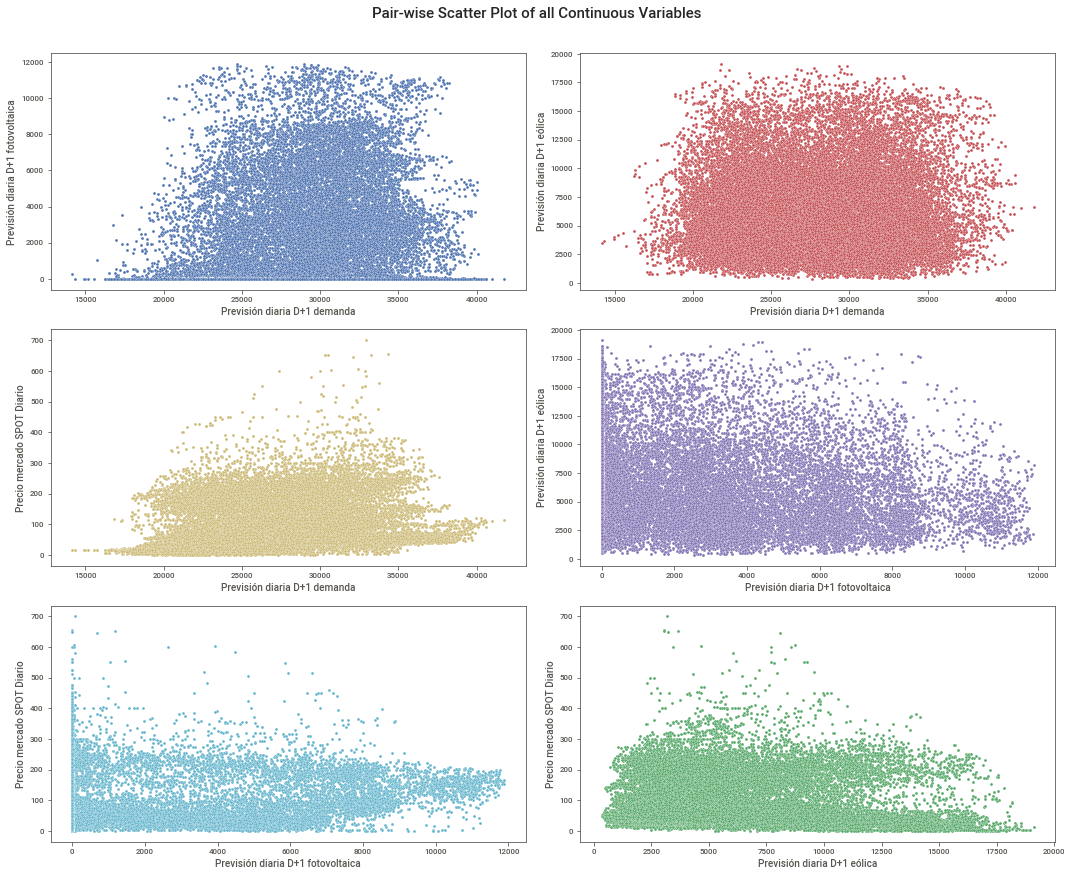

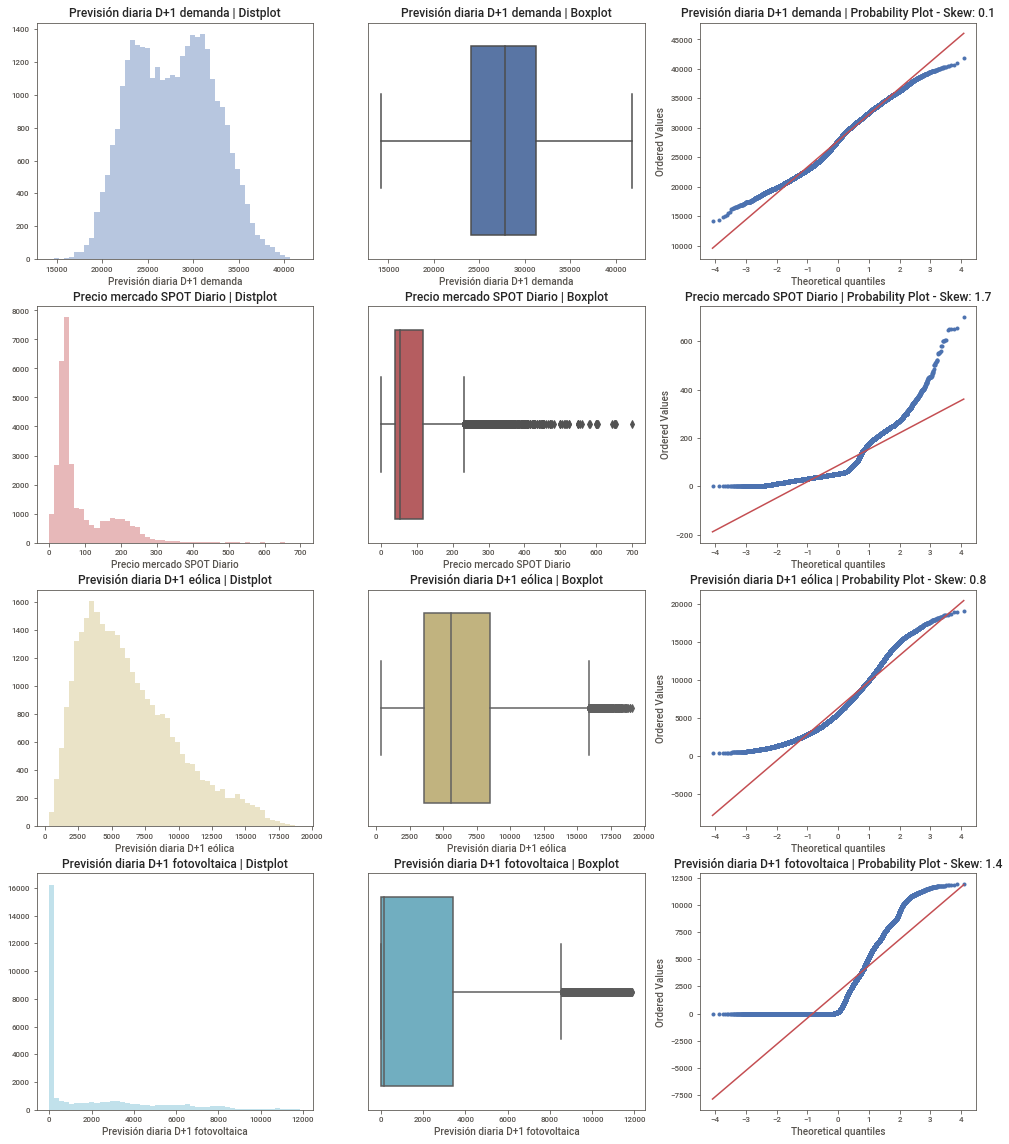

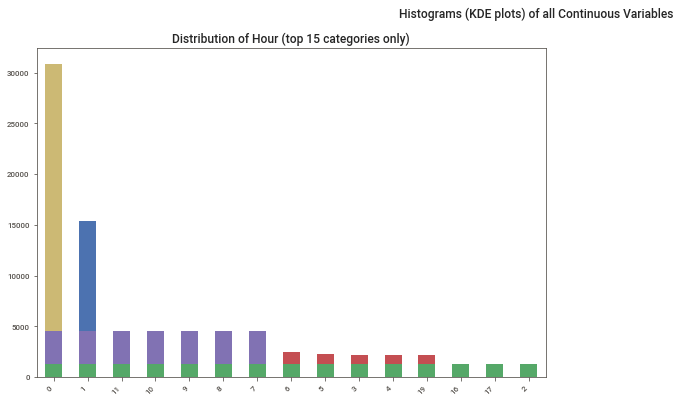

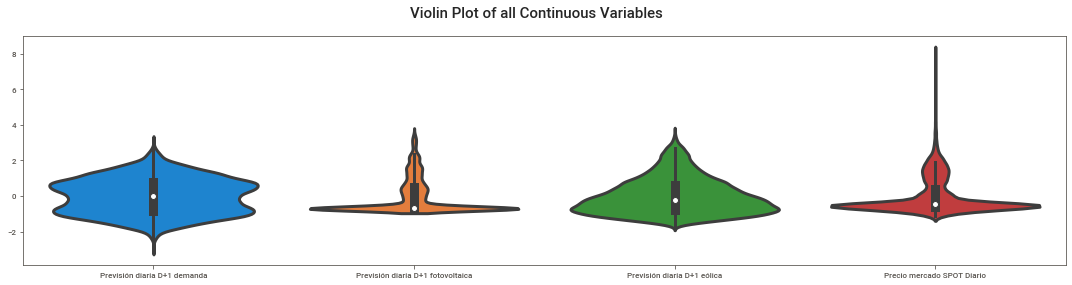

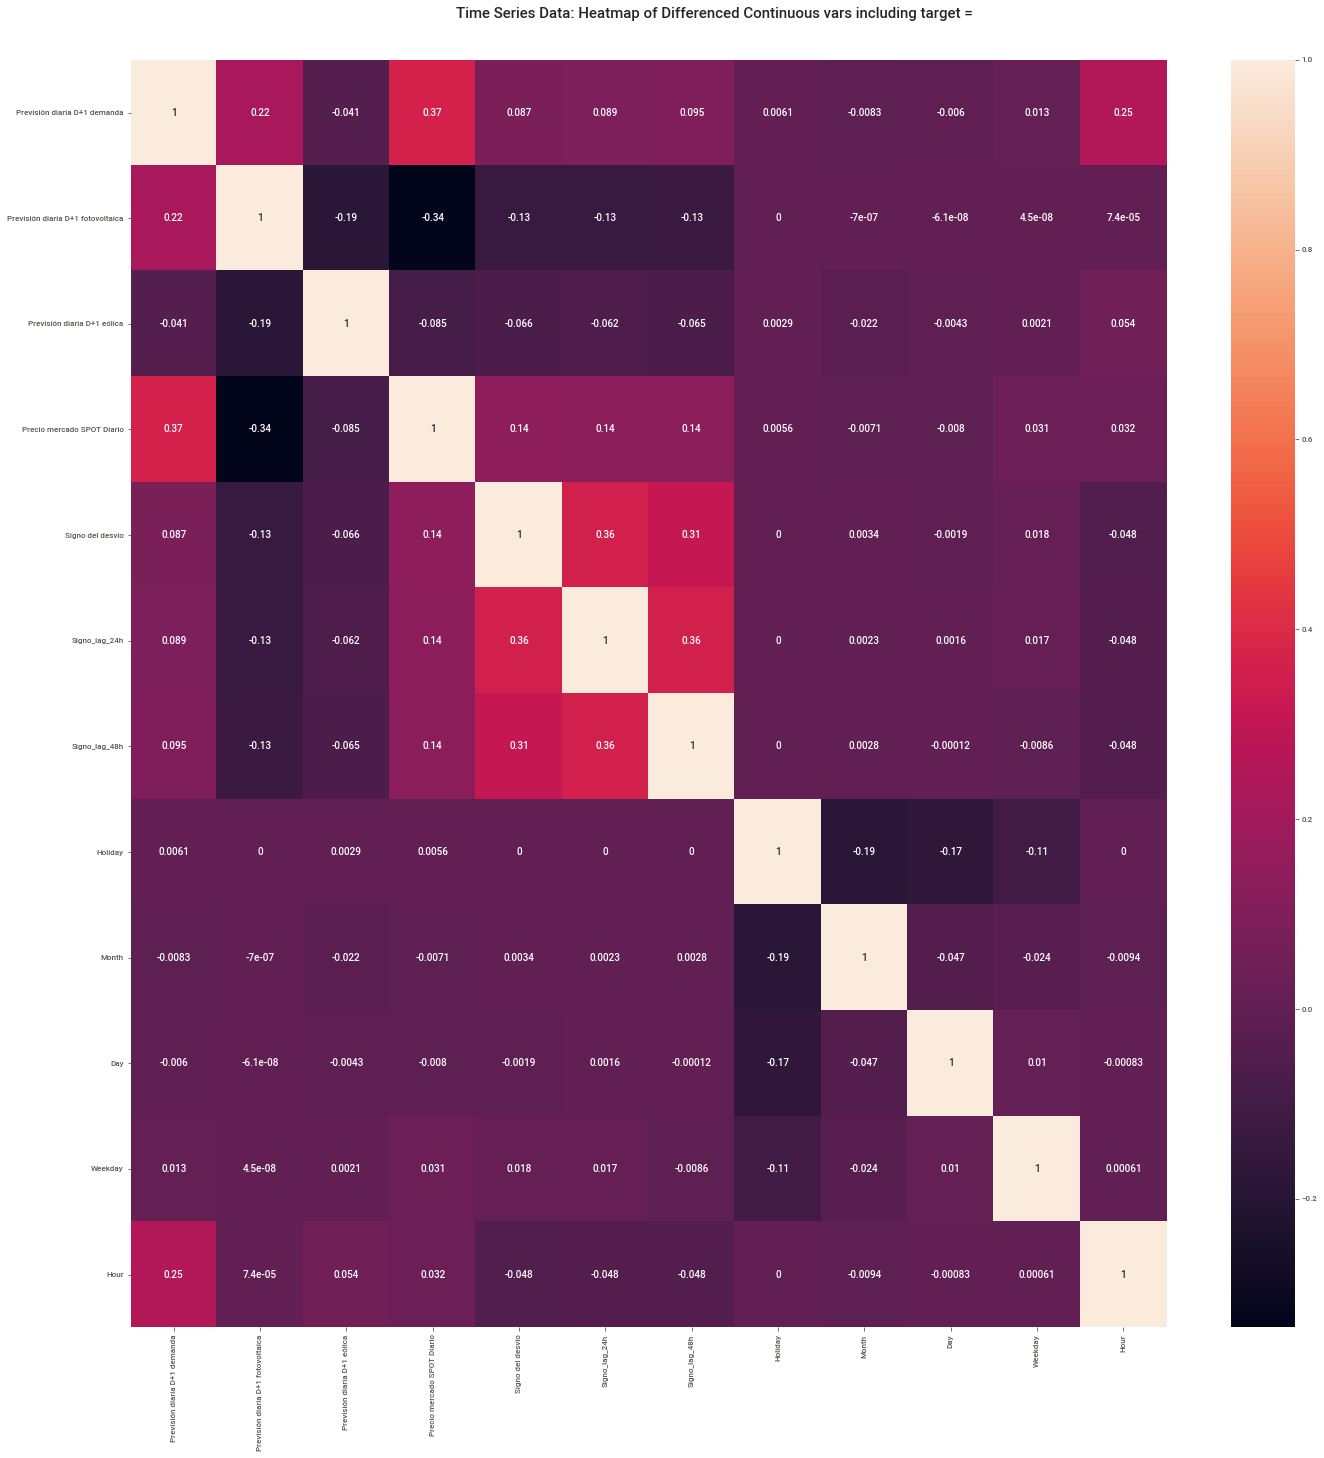

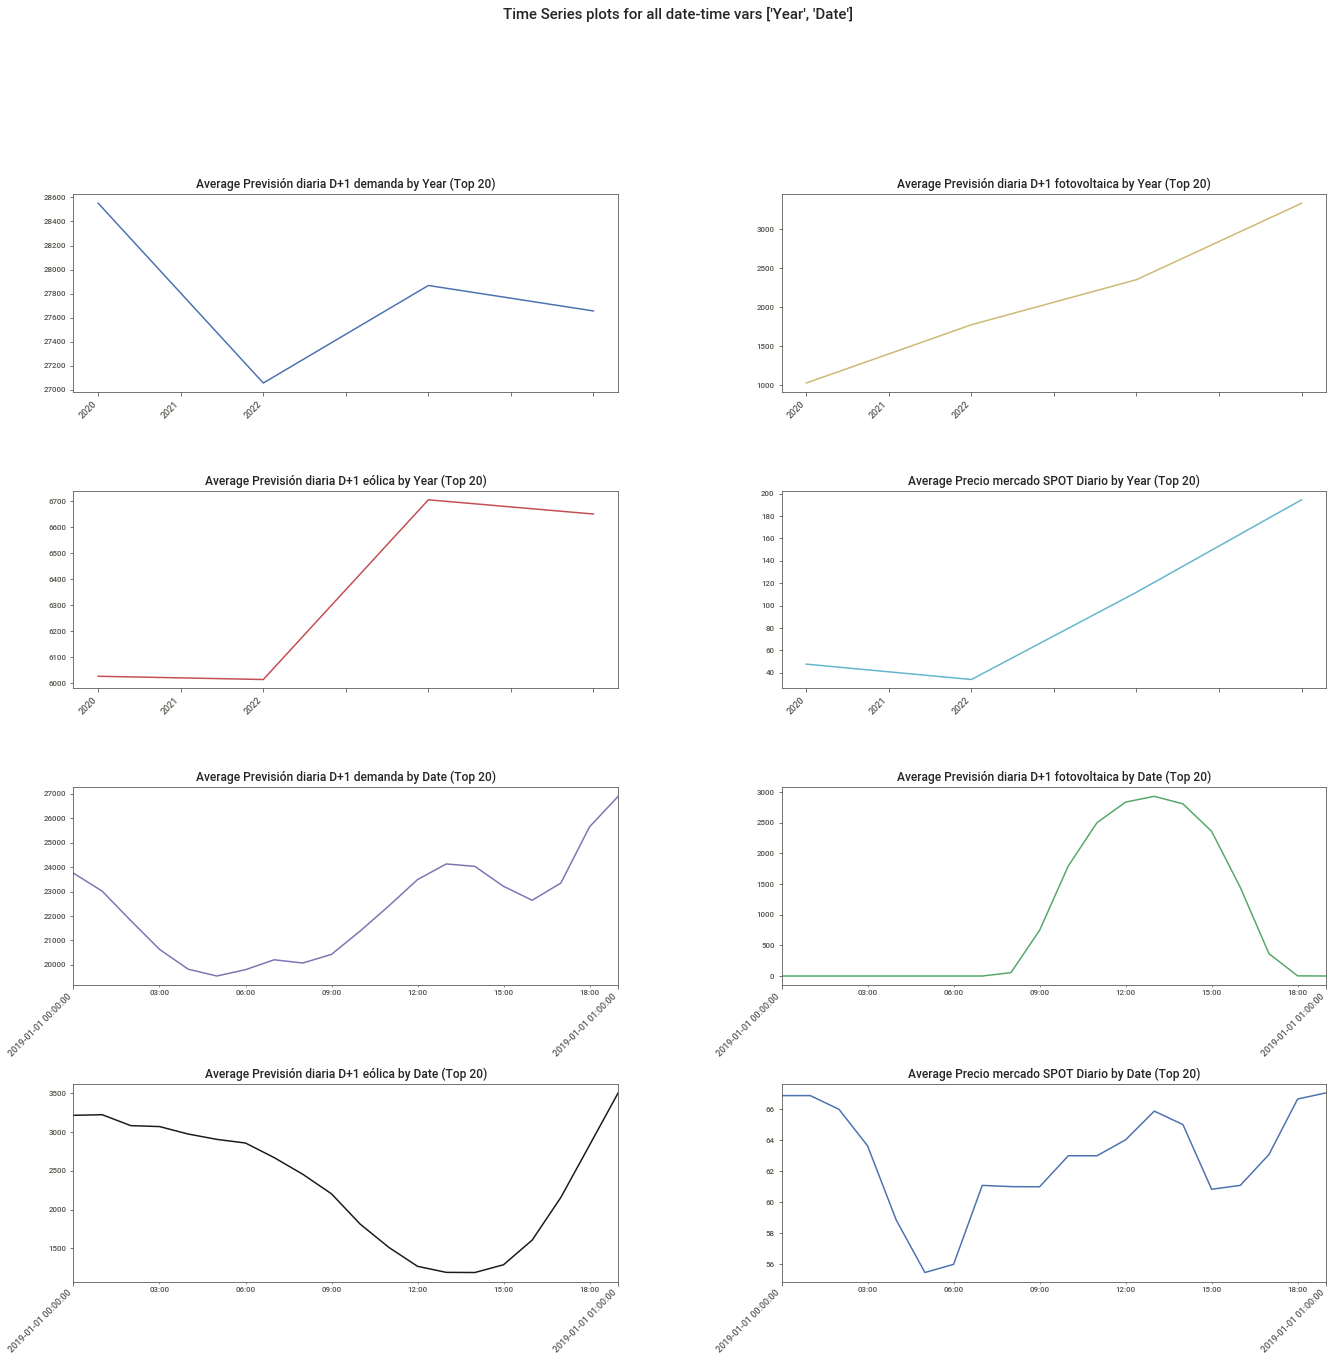

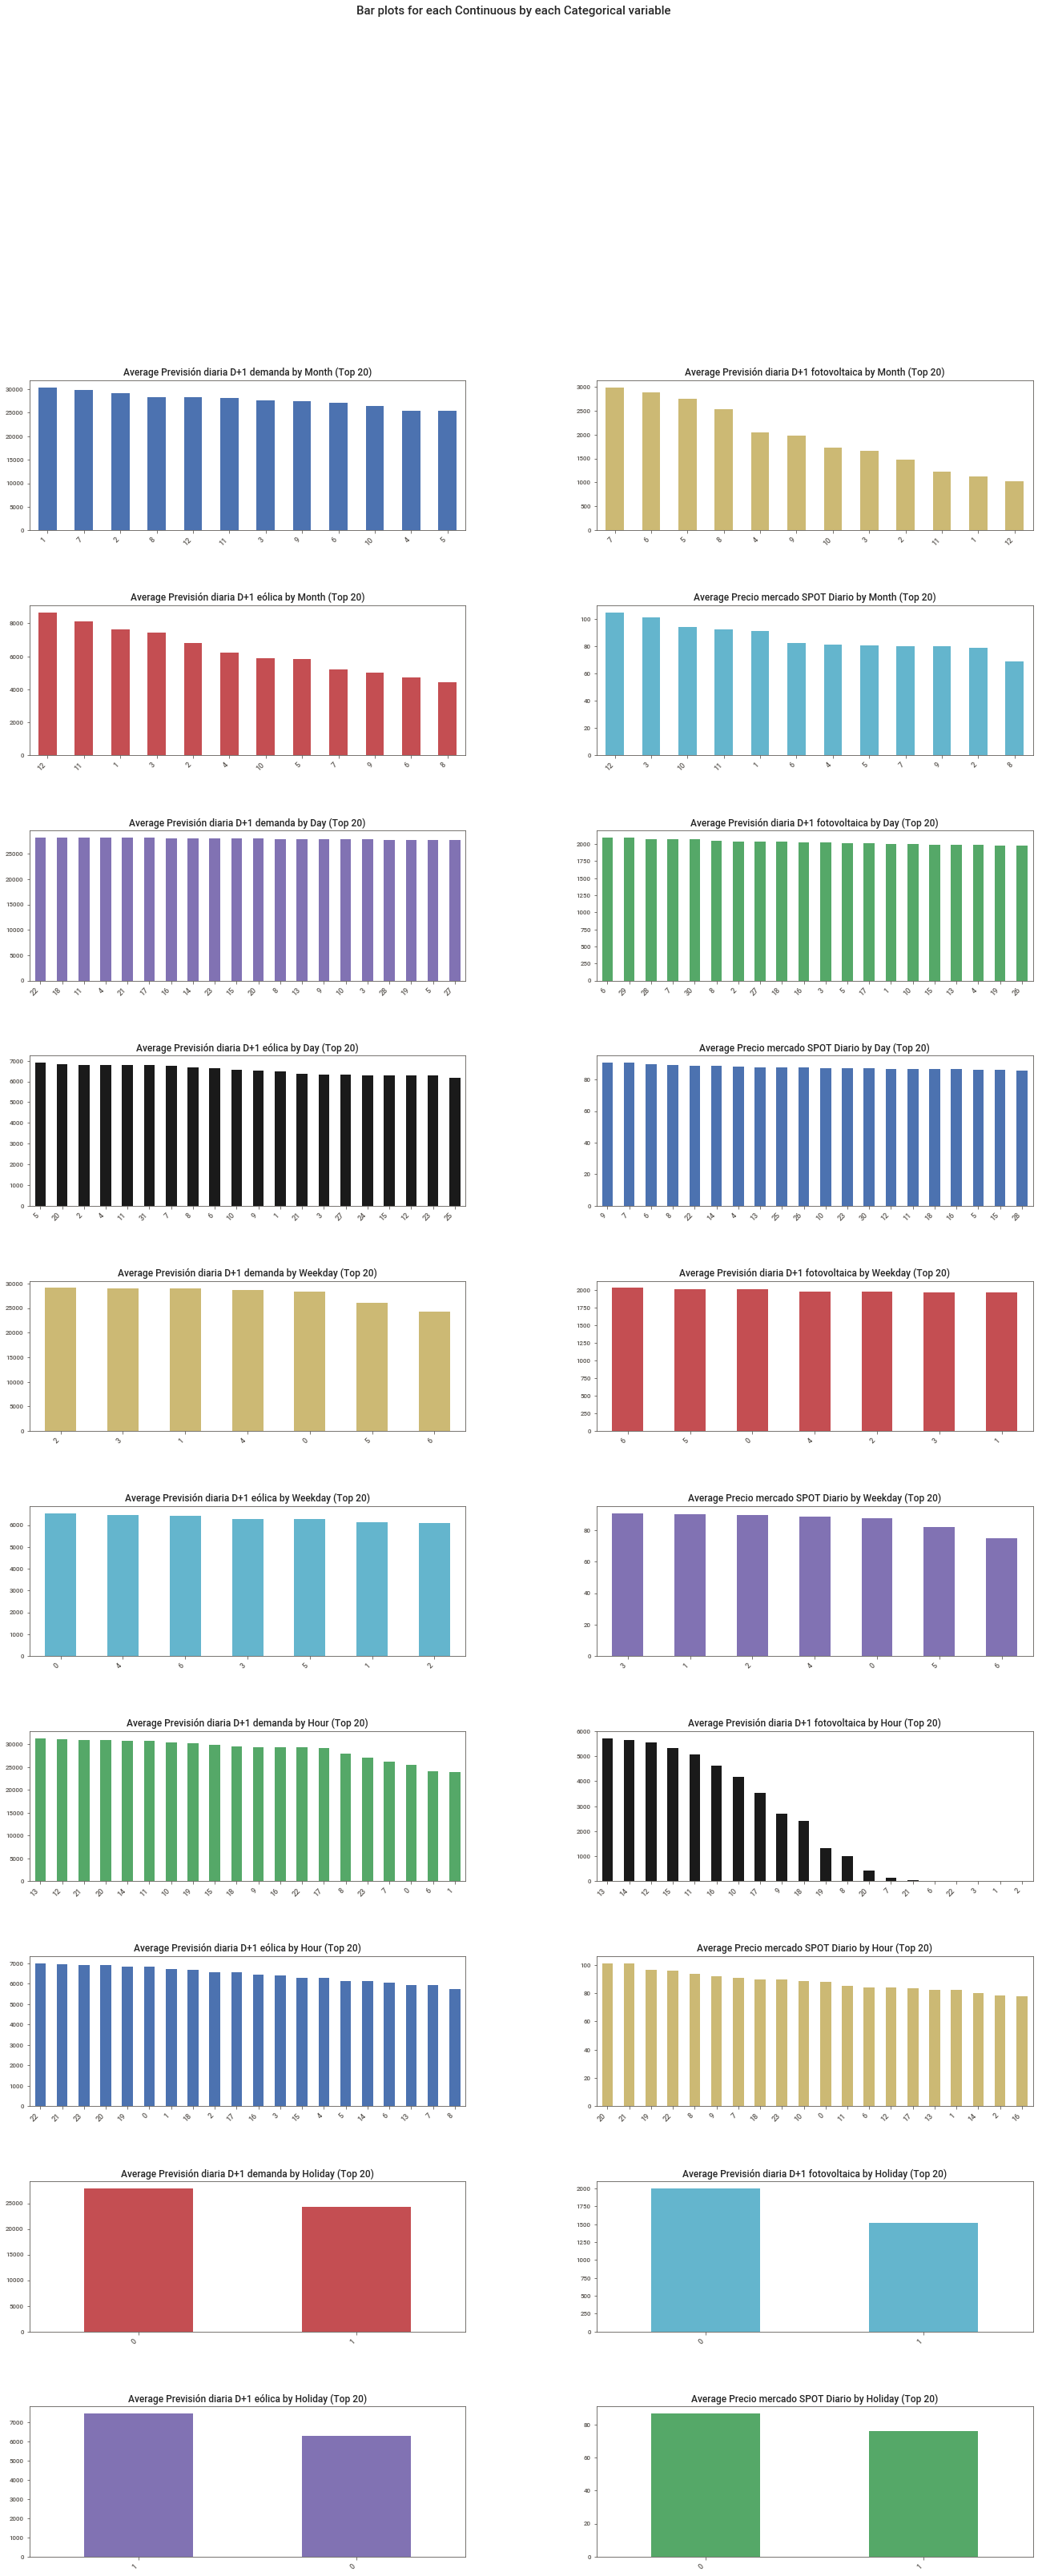

Time to run AutoViz (in seconds) = 46

 ###################### VISUALIZATION Completed ########################


Previsión diaria D+1 demanda  \
DateIndex                                           
2019-01-01 00:00:00                       23753.0   
2019-01-01 01:00:00                       23018.0   
2019-01-01 02:00:00                       21808.0   
2019-01-01 03:00:00                       20635.0   
2019-01-01 04:00:00                       19824.0   
...                                           ...   
2022-08-09 07:00:00                       26012.8   
2022-08-09 08:00:00                       27288.5   
2022-08-09 09:00:00                       29001.0   
2022-08-09 10:00:00                       30403.0   
2022-08-09 11:00:00                       31323.0   

                     Previsión diaria D+1 fotovoltaica  \
DateIndex                                                
2019-01-01 00:00:00                                0.0   
2019-01-01 01:00:00                                0.0   
2019-01-01 02:00:00                                0.0   
2019-01-01 03:00:00                                0.0   
2019-01-01 04:00:00                                0.0   
...                                                ...   
2022-08-09 07:00:00                              281.5   
2022-08-09 08:00:00                             2516.3   
2022-08-09 09:00:00                             6150.4   
2022-08-09 10:00:00                             8451.1   
2022-08-09 11:00:00                             9565.2   

                     Previsión diaria D+1 eólica  Precio mercado SPOT Diario  \
DateIndex                                                                      
2019-01-01 00:00:00                       3214.0                       66.88   
2019-01-01 01:00:00                       3222.0                       66.88   
2019-01-01 02:00:00                       3081.0                       66.00   
2019-01-01 03:00:00                       3069.0                       63.64   
2019-01-01 04:00:00                       2973.0                       58.85   
...                                          ...                         ...   
2022-08-09 07:00:00                       5303.3                      152.74   
2022-08-09 08:00:00                       4604.5                      152.85   
2022-08-09 09:00:00                       3798.5                      145.49   
2022-08-09 10:00:00                       3253.8                      140.00   
2022-08-09 11:00:00                       3271.8                      130.00   

                     Signo del desvío  Signo_lag_24h  Signo_lag_48h  Holiday  \
DateIndex                                                                      
2019-01-01 00:00:00              -1.0            NaN            NaN        1   
2019-01-01 01:00:00              -1.0            NaN            NaN        1   
2019-01-01 02:00:00              -1.0            NaN            NaN        1   
2019-01-01 03:00:00              -1.0            NaN            NaN        1   
2019-01-01 04:00:00              -1.0            NaN            NaN        1   
...                               ...            ...            ...      ...   
2022-08-09 07:00:00               1.0            1.0           -1.0        0   
2022-08-09 08:00:00               1.0            1.0            1.0        0   
2022-08-09 09:00:00               1.0            1.0           -1.0        0   
2022-08-09 10:00:00               1.0            1.0            1.0        0   
2022-08-09 11:00:00               1.0            1.0            1.0        0   

                     Year  Month  Day  Weekday  Hour                Date  
DateIndex                                                                 
2019-01-01 00:00:00  2019      1    1        1     0 2019-01-01 00:00:00  
2019-01-01 01:00:00  2019      1    1        1     1 2019-01-01 01:00:00  
2019-01-01 02:00:00  2019      1    1        1     2 2019-01-01 02:00:00  
2019-01-01 03:00:00  2019      1    1        1     3 2019-01-01 03:00:00  
2019-01-01 04:00:00  2019      1    1       

In [66]:
#EDA using Autoviz
AV.AutoViz("", dfte=df, verbose=2)
AV.AutoViz("", dfte=df, verbose=0)

Shape of your Data Set loaded: (31631, 13)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 31631 rows, 12 cols
Data Set columns info:
* Previsión diaria D+1 demanda: 0 nulls, 15616 unique vals, most common: {31446.0: 9, 24553.0: 9}
* Previsión diaria D+1 fotovoltaica: 0 nulls, 15381 unique vals, most common: {0.0: 13404, 0.1: 75}
* Previsión diaria D+1 eólica: 0 nulls, 13217 unique vals, most common: {5106.0: 13, 3550.0: 11}
* Precio mercado SPOT Diario: 0 nulls, 11520 unique vals, most common: {1.95: 108, 50.0: 92}
* Signo_lag_24h: 28 nulls, 2 unique vals, most common: {-1.0: 16182, 1.0: 15421}
* Signo_lag_48h: 48 nulls, 2 unique vals, most common: {-1.0: 16176, 1.0: 15407}
* Holiday: 0 nulls, 2 unique vals, most common: {0: 30911, 1: 720}
* Year: 0 nulls, 4 unique vals, most common: {2020: 8784, 2021: 8760}
* Month: 0 nulls, 12 unique vals, most common: {7: 2976, 5: 2976}
* Day: 0 nulls, 31 unique vals

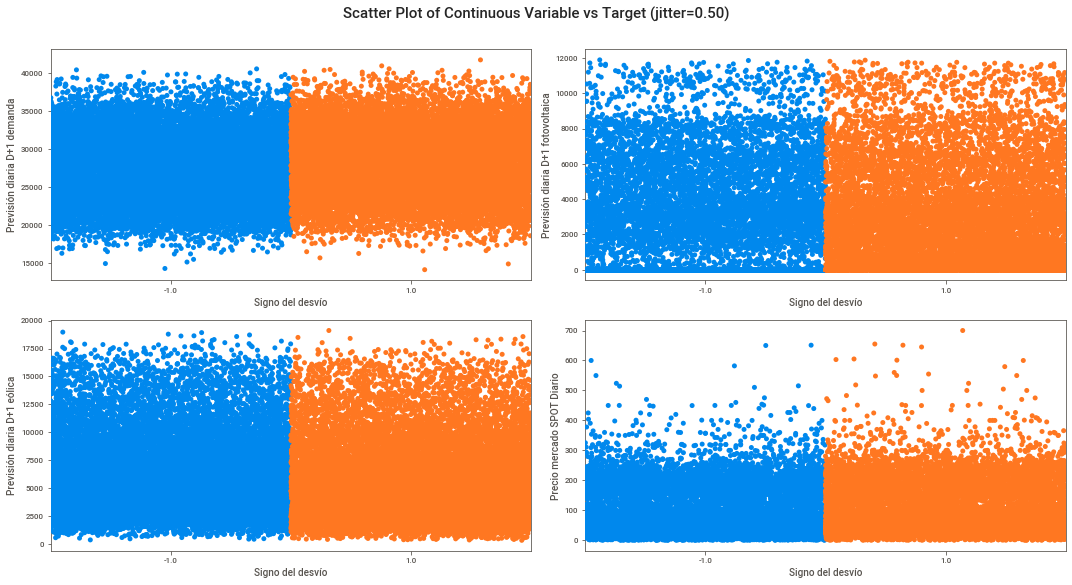

Total Number of Scatter Plots = 10


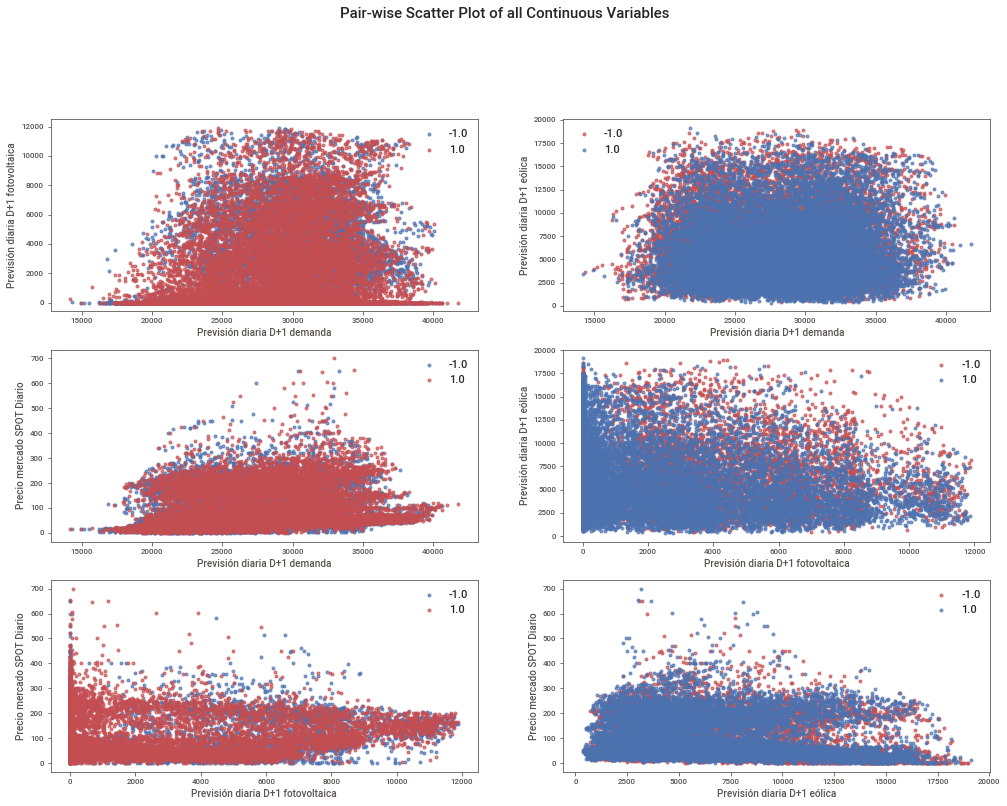

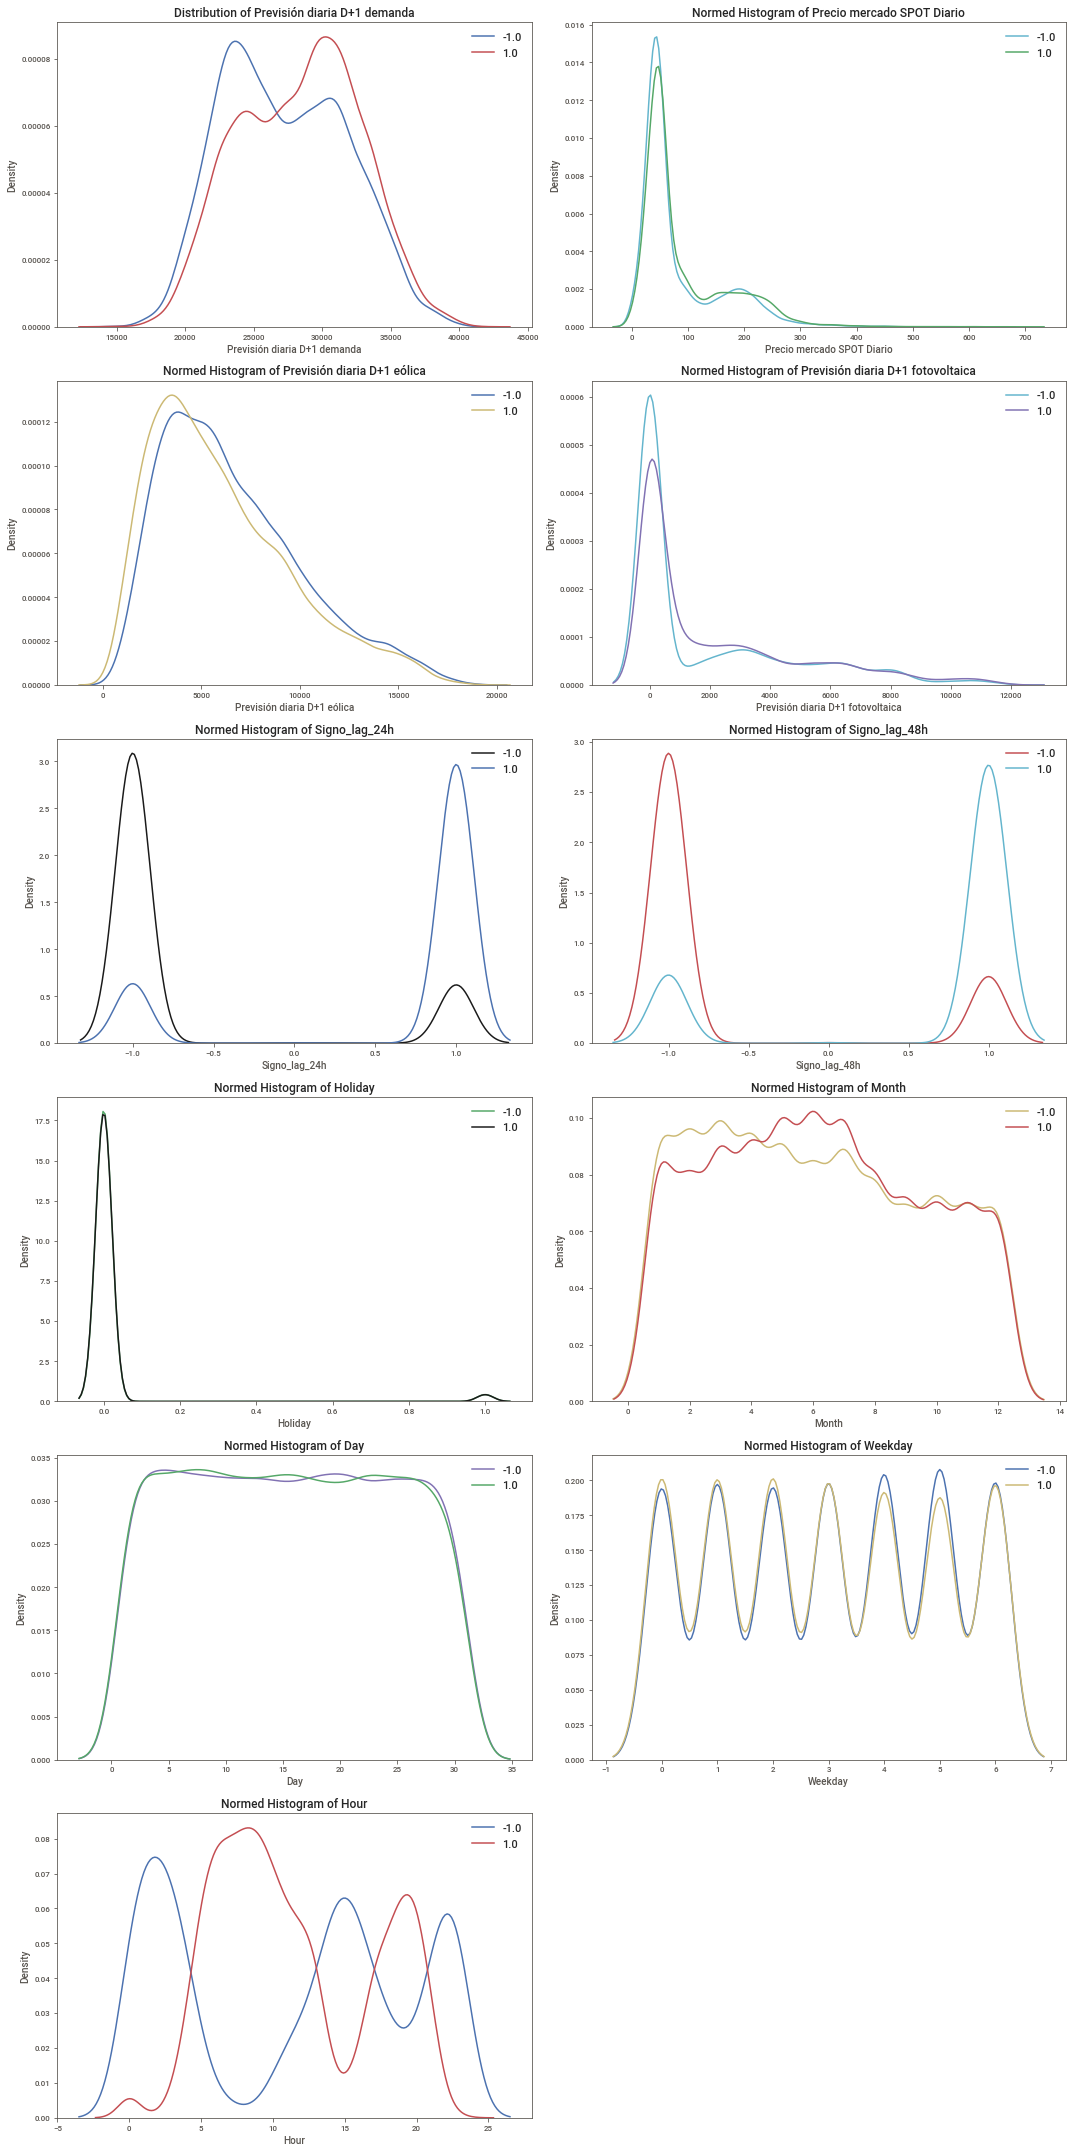

Could not draw Distribution Plots


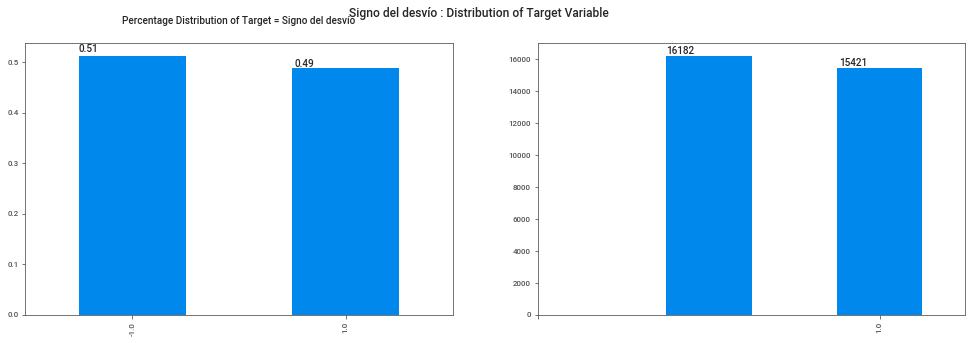

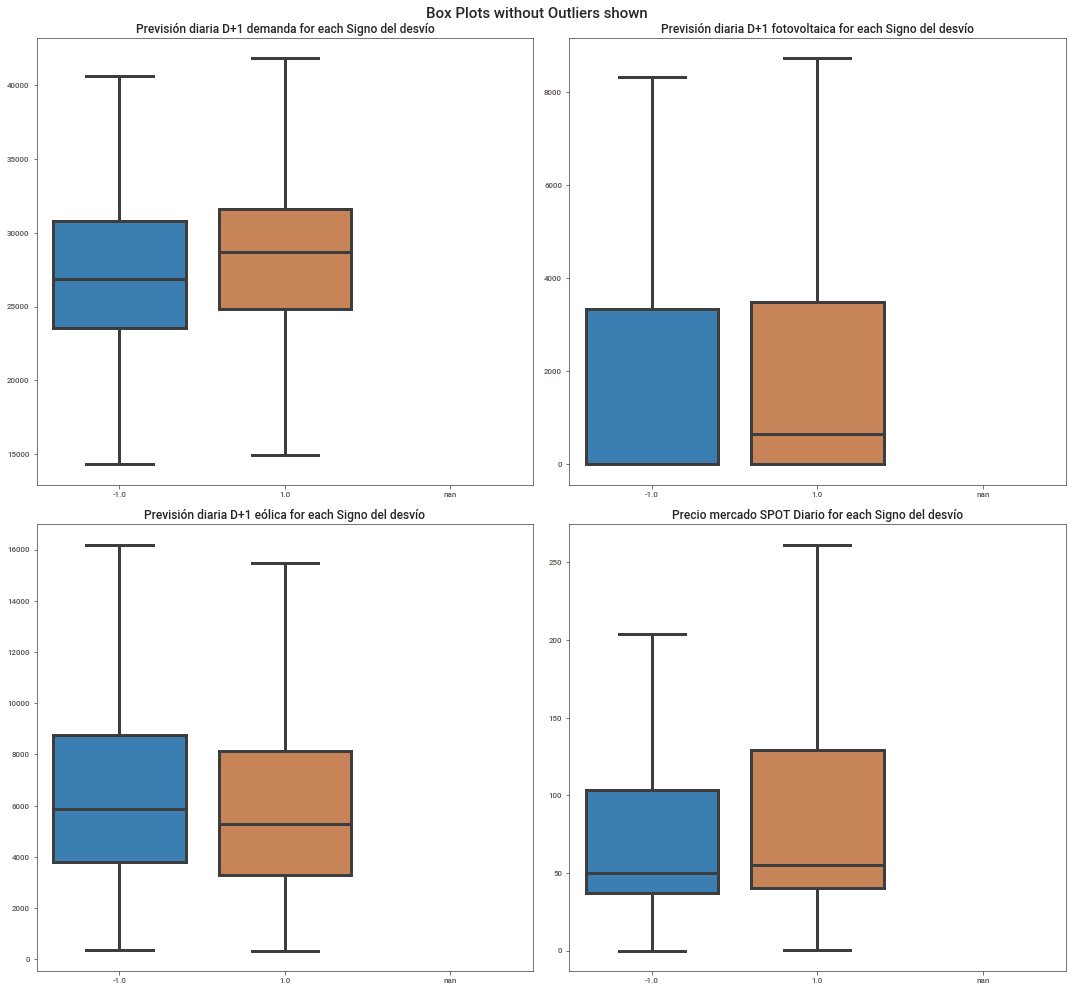

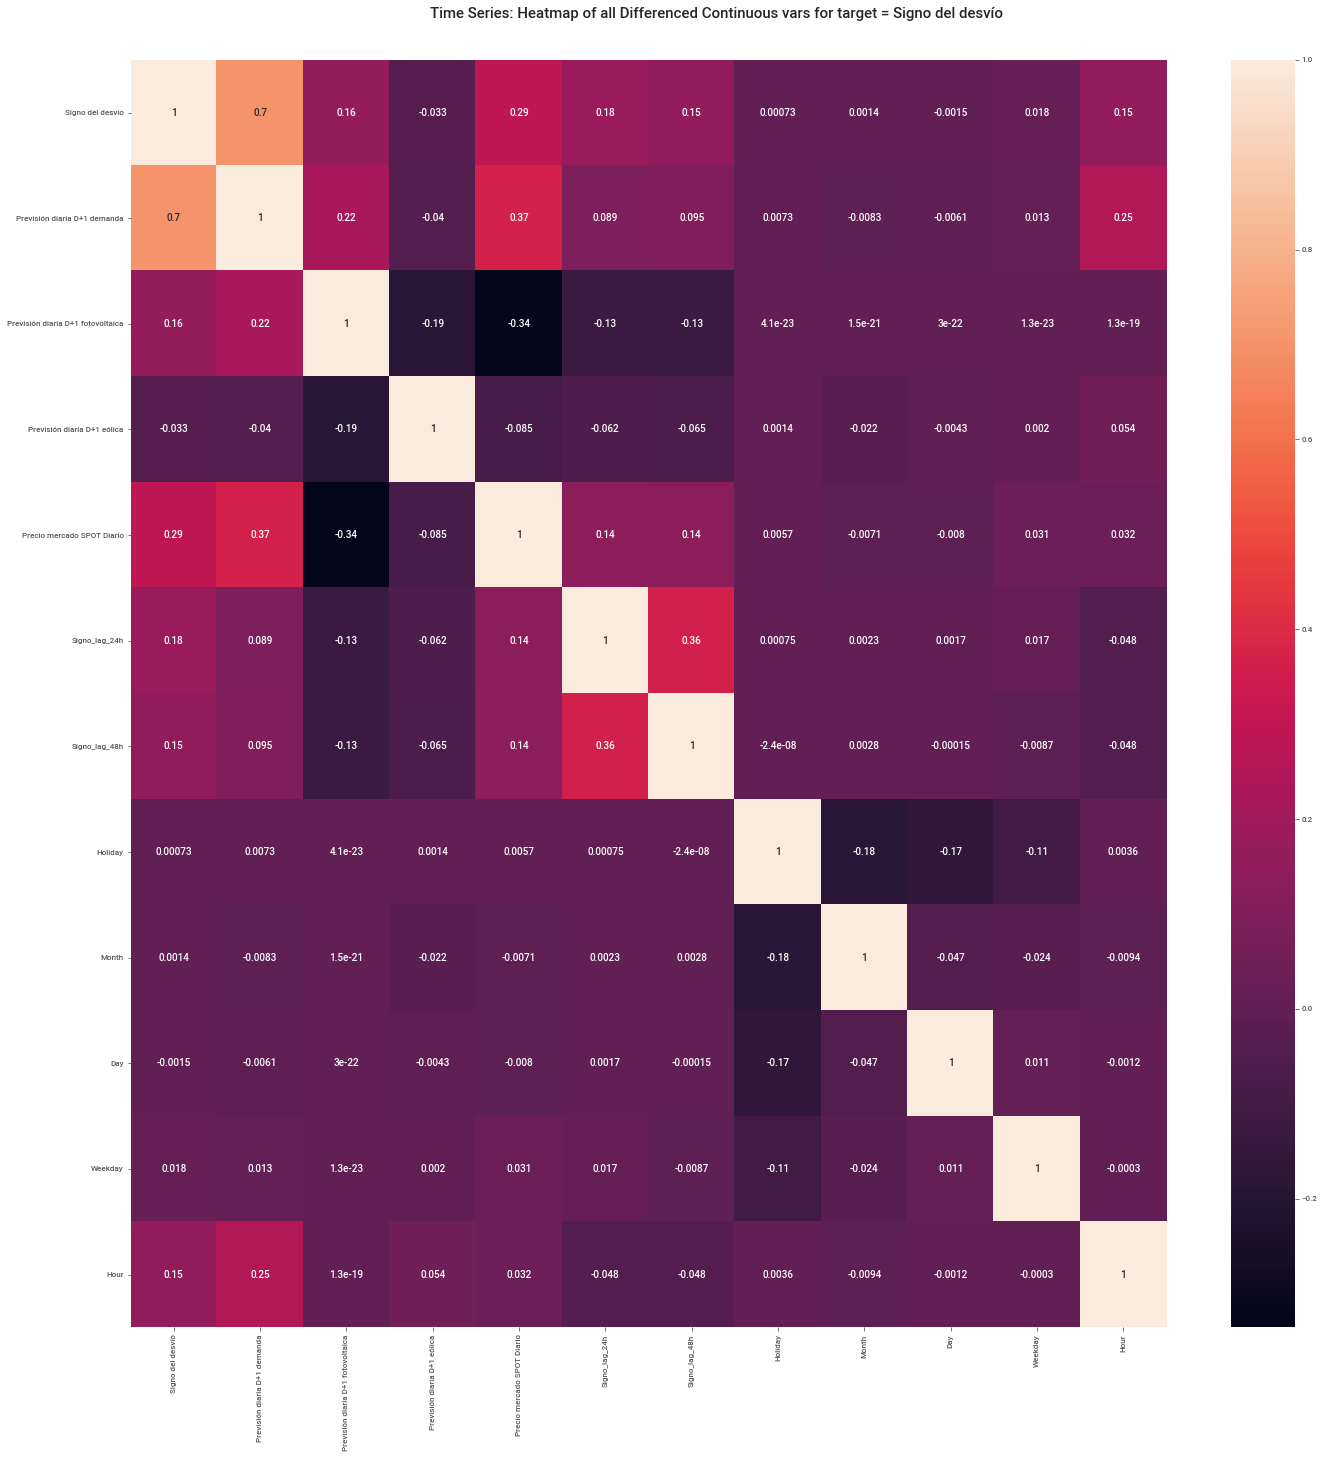

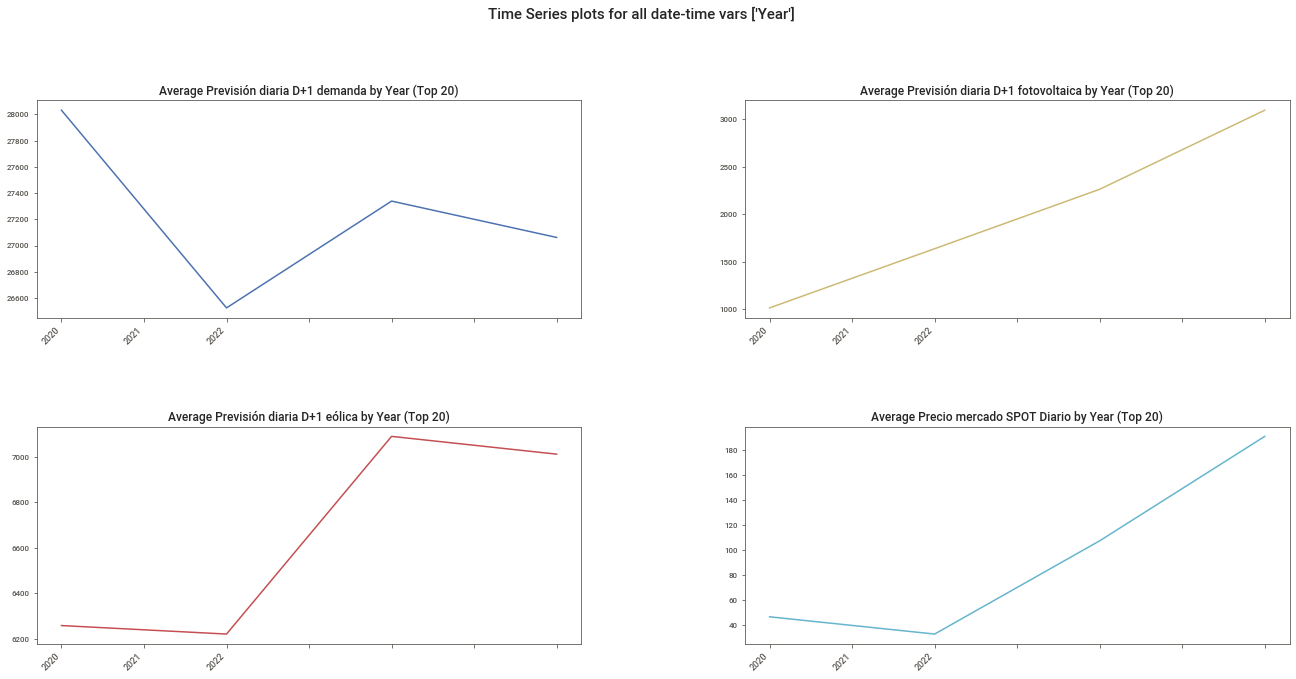

Could not draw Time Series plots


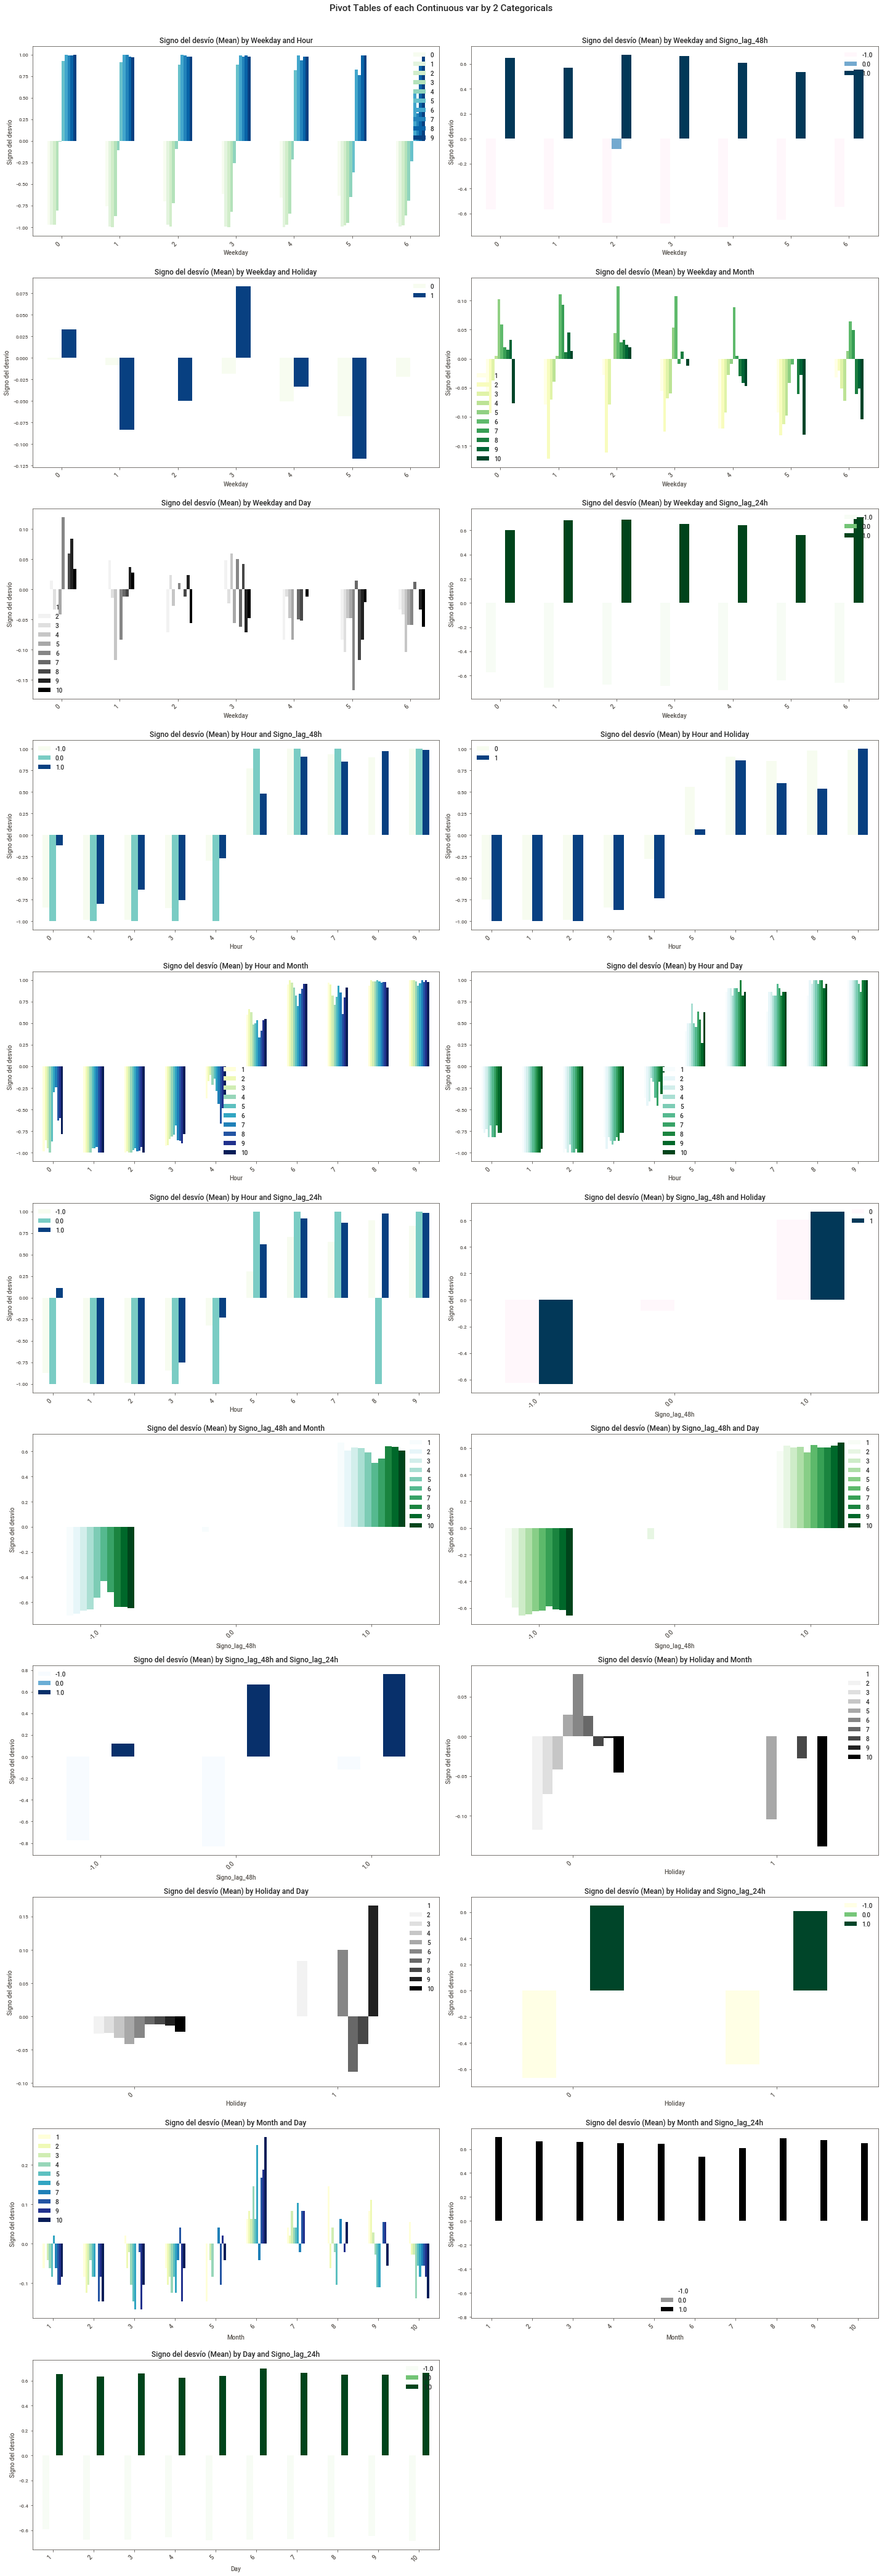

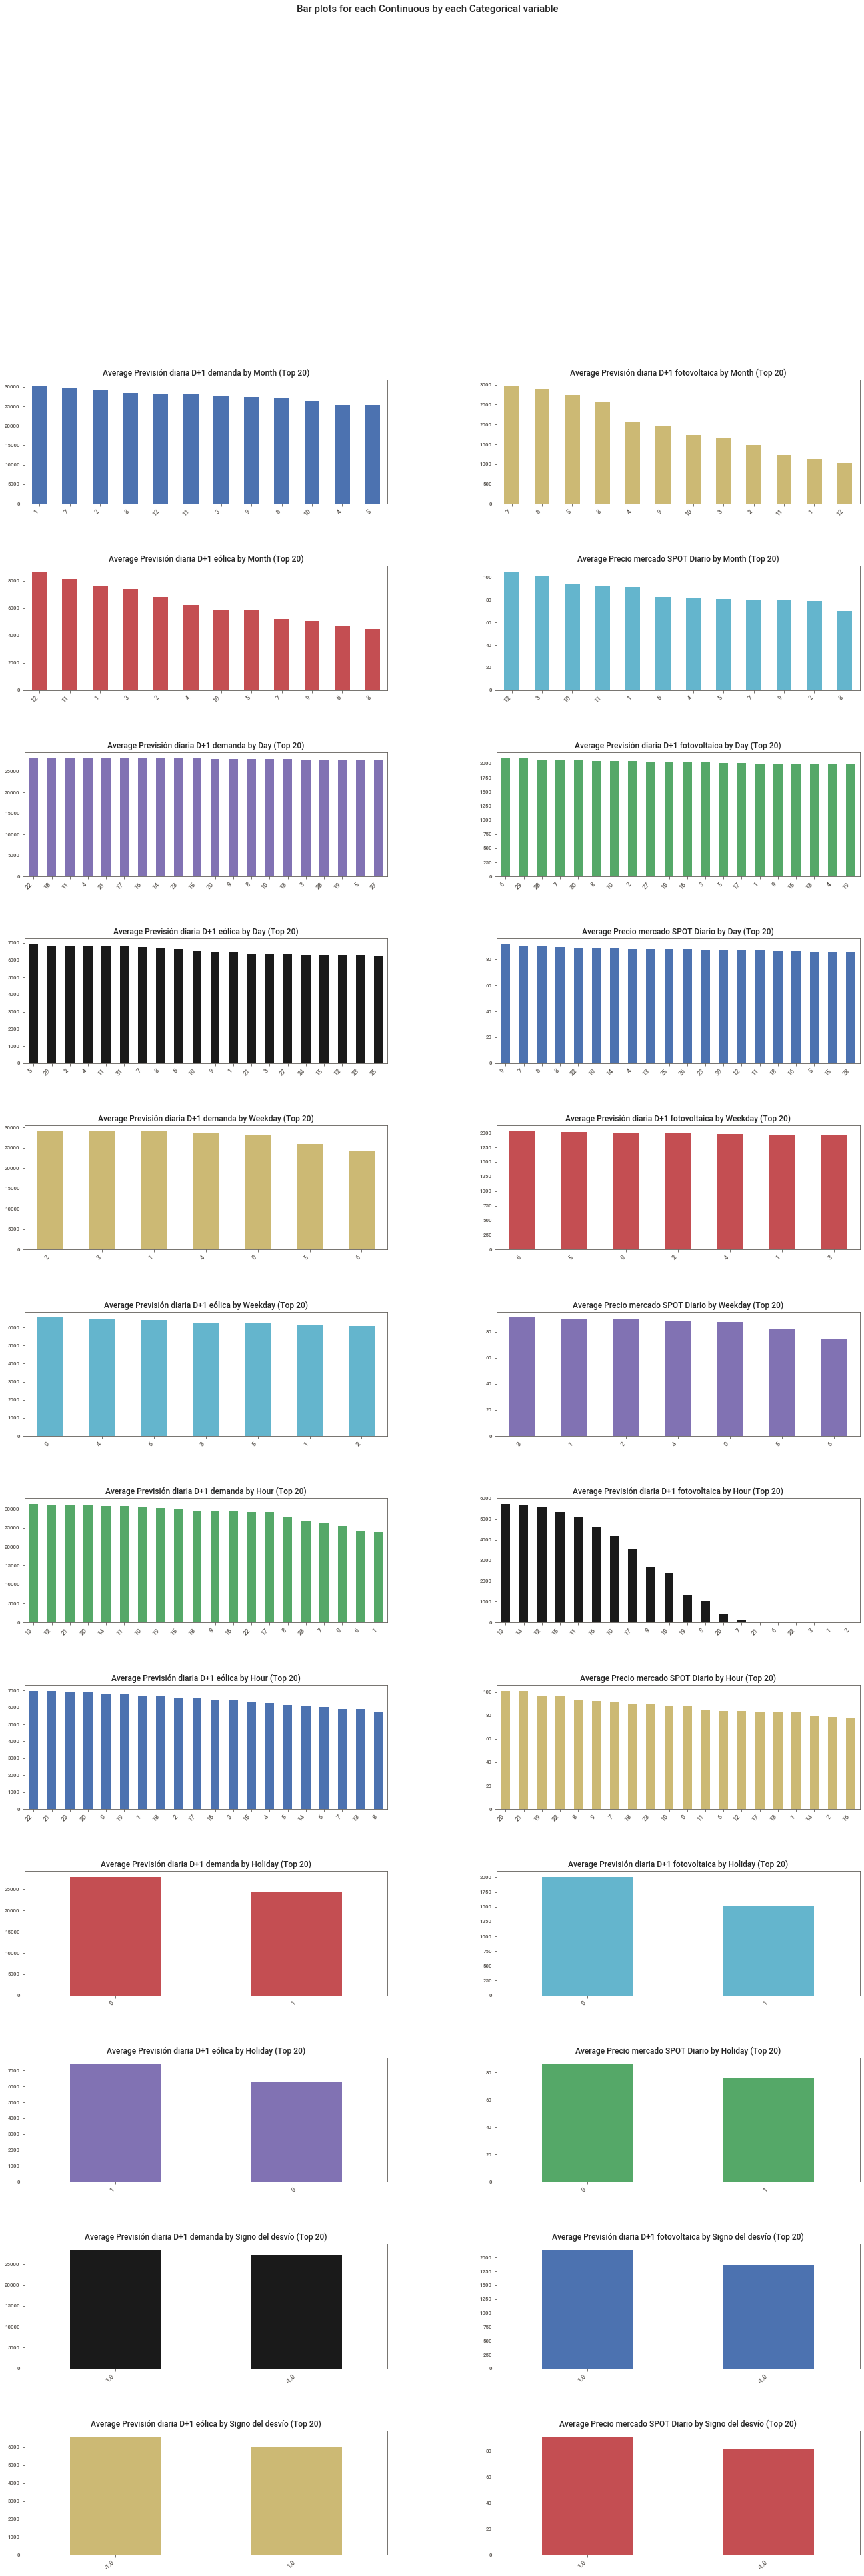

Time to run AutoViz (in seconds) = 60

 ###################### VISUALIZATION Completed ########################


Previsión diaria D+1 demanda  \
DateIndex                                           
2019-01-01 00:00:00                       23753.0   
2019-01-01 01:00:00                       23018.0   
2019-01-01 02:00:00                       21808.0   
2019-01-01 03:00:00                       20635.0   
2019-01-01 04:00:00                       19824.0   
...                                           ...   
2022-08-10 19:00:00                       31688.3   
2022-08-10 20:00:00                       31126.5   
2022-08-10 21:00:00                       31363.5   
2022-08-10 22:00:00                       30481.8   
2022-08-10 23:00:00                       28347.0   

                     Previsión diaria D+1 fotovoltaica  \
DateIndex                                                
2019-01-01 00:00:00                                0.0   
2019-01-01 01:00:00                                0.0   
2019-01-01 02:00:00                                0.0   
2019-01-01 03:00:00                                0.0   
2019-01-01 04:00:00                                0.0   
...                                                ...   
2022-08-10 19:00:00                             4284.4   
2022-08-10 20:00:00                             1513.6   
2022-08-10 21:00:00                               99.6   
2022-08-10 22:00:00                                0.0   
2022-08-10 23:00:00                                0.0   

                     Previsión diaria D+1 eólica  Precio mercado SPOT Diario  \
DateIndex                                                                      
2019-01-01 00:00:00                       3214.0                       66.88   
2019-01-01 01:00:00                       3222.0                       66.88   
2019-01-01 02:00:00                       3081.0                       66.00   
2019-01-01 03:00:00                       3069.0                       63.64   
2019-01-01 04:00:00                       2973.0                       58.85   
...                                          ...                         ...   
2022-08-10 19:00:00                       4608.0                      153.15   
2022-08-10 20:00:00                       4780.5                      166.50   
2022-08-10 21:00:00                       5048.3                      171.68   
2022-08-10 22:00:00                       5336.0                      170.01   
2022-08-10 23:00:00                       5238.0                      163.95   

                     Signo_lag_24h  Signo_lag_48h  Holiday  Year  Month  Day  \
DateIndex                                                                      
2019-01-01 00:00:00            0.0            0.0        1  2019      1    1   
2019-01-01 01:00:00            0.0            0.0        1  2019      1    1   
2019-01-01 02:00:00            0.0            0.0        1  2019      1    1   
2019-01-01 03:00:00            0.0            0.0        1  2019      1    1   
2019-01-01 04:00:00            0.0            0.0        1  2019      1    1   
...                            ...            ...      ...   ...    ...  ...   
2022-08-10 19:00:00           -1.0            1.0        0  2022      8   10   
2022-08-10 20:00:00            0.0            1.0        0  2022      8   10   
2022-08-10 21:00:00            0.0            1.0        0  2022      8   10   
2022-08-10 22:00:00            0.0            1.0        0  2022      8   10   
2022-08-10 23:00:00            0.0           -1.0        0  2022      8   10   

                     Weekday  Hour  Signo del desvío  
DateIndex                                             
2019-01-01 00:00:00        1     0              -1.0  
2019-01-01 01:00:00        1     1              -1.0  
2019-01-01 02:00:00        1     2              -1.0  
2019-01-01 03:00:00        1     3              -1.0  
2019-01-01 04:00:00        1     4              -1.0  
...                      ...   ...               ...  
2022-08-10 19:00:00        2    19               NaN  

In [67]:
AV.AutoViz("", dfte=df_full, verbose=2, lowess=True, depVar='Signo del desvío')
AV.AutoViz("", dfte=df_full, verbose=0, lowess=True, depVar='Signo del desvío')

In [69]:
import dtale

dtale.show(df)

#### Time series related ad-hoc plots

Text(0.5, 1.0, 'Precio mercado SPOT Diario')

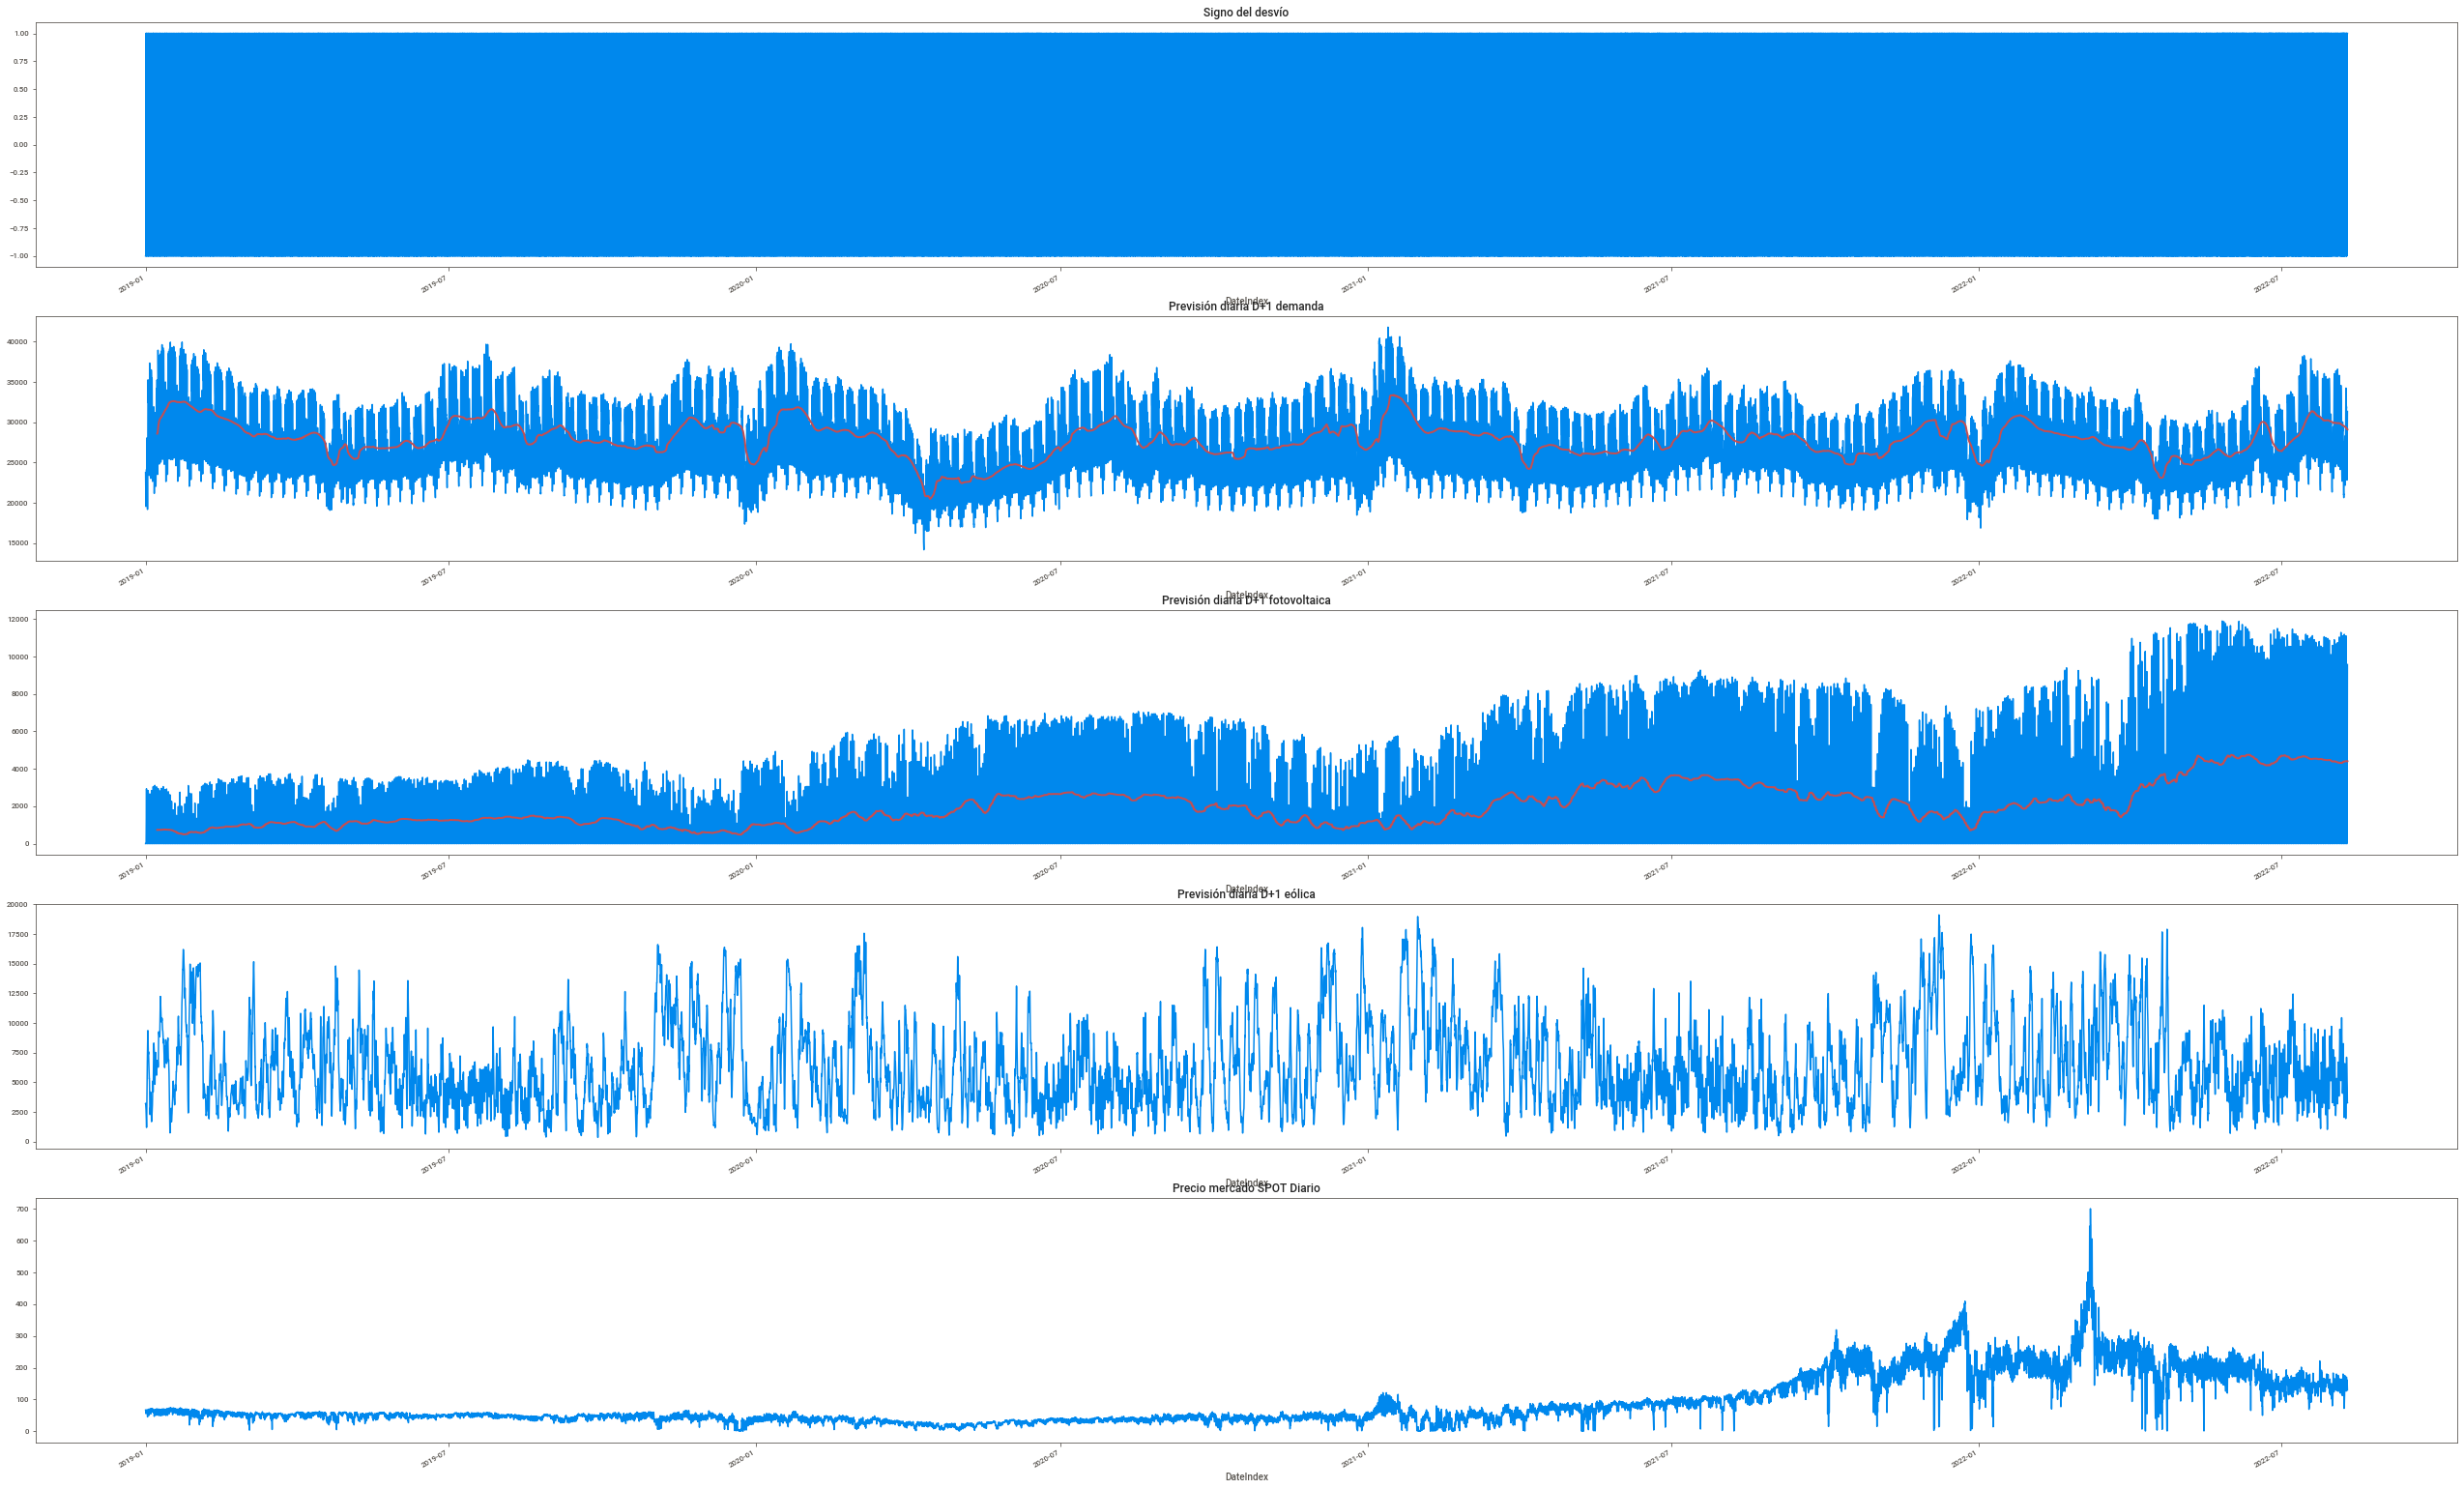

In [70]:
# Historical data evolution
nrows = 5
ncols = 1

window = 24*7 ## Weekly moving average

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40,30))
ax = plt.subplot(nrows, 1, 1)
var ="Signo del desvío"
ax = df[var].plot(ax=ax)
ax.set_title(var)
#ax.set_ylim([, ])
#ax.set_xlabel('')
#ax.set_ylabel('')


ax = plt.subplot(nrows, 1, 2)
var ="Previsión diaria D+1 demanda"
ax = df[var].plot(ax=ax)
ax = df[var].rolling(window=window).mean().plot(color = "r", linewidth=2, ax=ax)  
ax.set_title(var)

ax = plt.subplot(nrows, 1, 3)
var ="Previsión diaria D+1 fotovoltaica"
ax = df[var].plot(ax=ax)
ax = df[var].rolling(window=window).mean().plot(color = "r", linewidth=2, ax=ax) 
ax.set_title(var)

ax = plt.subplot(nrows, 1, 4)
var ="Previsión diaria D+1 eólica"
ax = df[var].plot(ax=ax)
ax.set_title(var)

ax = plt.subplot(nrows, 1, 5)
var ="Precio mercado SPOT Diario"
ax = df[var].plot(ax=ax)
ax.set_title(var)

[]

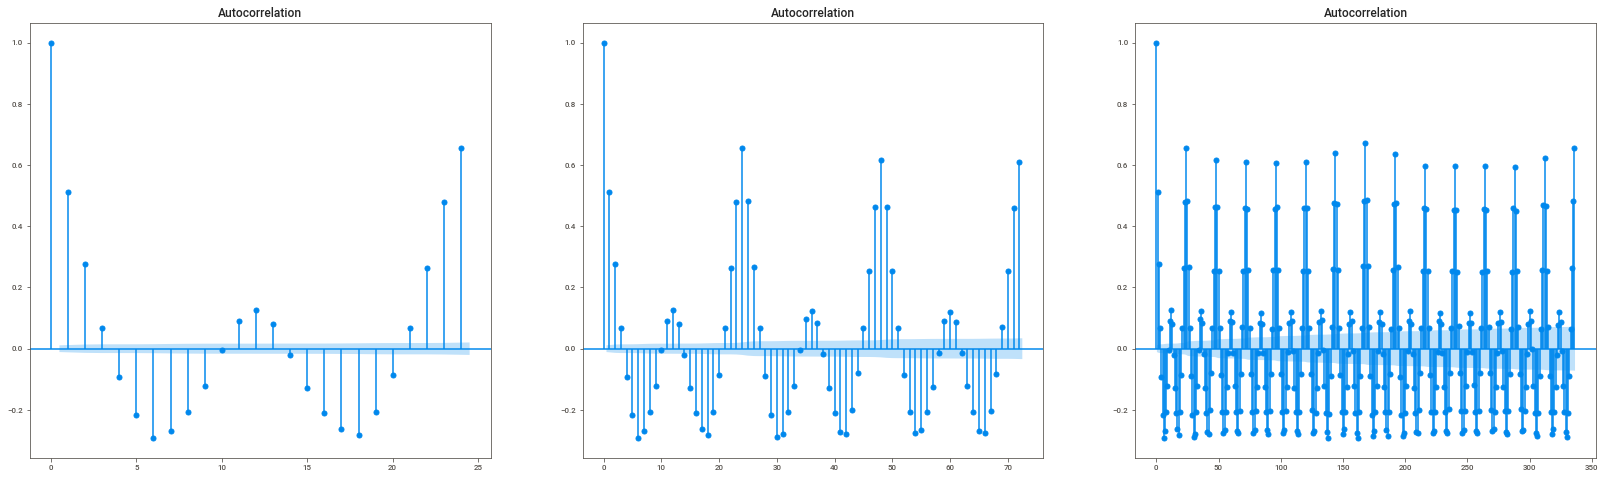

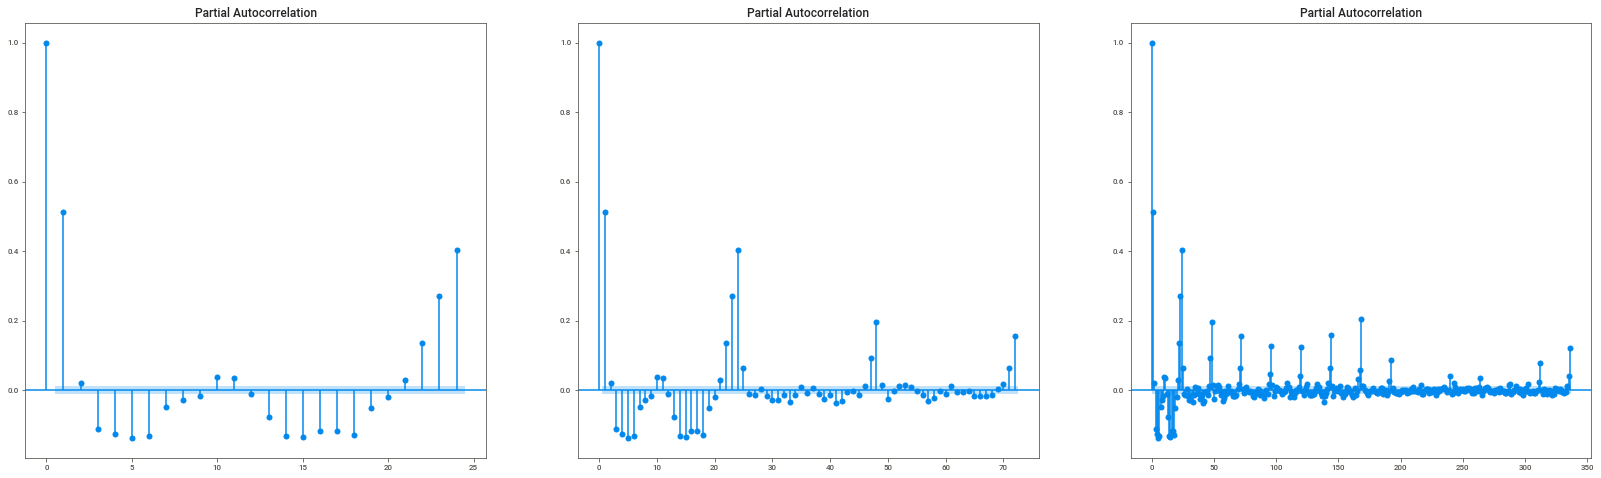

In [71]:
#Autocorrelations
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

signo_desvíos = df["Signo del desvío"]
lags = [24, 72, 14*24]

fig, axs = plt.subplots(1, 3, figsize=(25,8))

for ax, lag in zip(axs.flatten(), lags):
    plot_acf(signo_desvíos, ax=ax, lags=lag)
plt.plot()

fig, axs = plt.subplots(1, 3, figsize=(25,8))
for ax, lag in zip(axs.flatten(), lags):
    plot_pacf(signo_desvíos, ax=ax, lags=lag)
plt.plot()